# Лабораторная работа 4
Работа № 4
1. Реализовать метод локальной аппроксимации, как он описан у проф. А.Ю. Лоскутова и продемонстрировать его применение к имеющимся рядам.
2. Сделать вывод о качестве прогноза и применимости к разного рода процессам.
3. Альтернативный вариант: тоже для метода максимального подобия им. И. А. Чучуевой


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
periodical_df = pd.read_csv('../data/period.csv')[1600:2500]
periodical_df['Moving_Average'] = periodical_df['Temp'].rolling(window=20).mean()
period_ts = periodical_df.Moving_Average.values[20:]
period_ts= MinMaxScaler().fit_transform(period_ts.reshape(-1, 1)).flatten()

In [3]:
def generate_random_walk(steps):
    """Случайное блуждание"""
    import random
    position = 0
    time_series = [position]
    random.seed(42)
    for _ in range(1,steps):
        step = random.choice([-1, 1])
        position += step
        time_series.append(position)
    return np.array(time_series)

random_ts = generate_random_walk(880)
random_ts= MinMaxScaler().fit_transform(random_ts.reshape(-1, 1)).flatten()

In [4]:
def forecast(data: np.array, h: int, m: int) -> np.array:
    z0 = data[-m:]
    z = [data[i:i + m] for i in range(len(data) - (m + h + 1), 0, -1)]
    covariances = [np.cov(z0, x)[0, 1] / (np.std(x) * np.std(z0)) for x in z]
    max_idx = len(data) - (m + h + 1) - np.argmax(covariances)
    zk = data[max_idx:max_idx + m].reshape(-1, 1)
    zk = np.hstack([zk, np.ones(m).reshape(-1, 1)])
    coef = np.matmul(np.matmul(zk.T, z0.reshape(-1, 1)).T, np.linalg.inv(np.matmul(zk.T, zk)))[0]
    
    return data[max_idx + m:max_idx + m + h] * coef[0] + coef[-1]

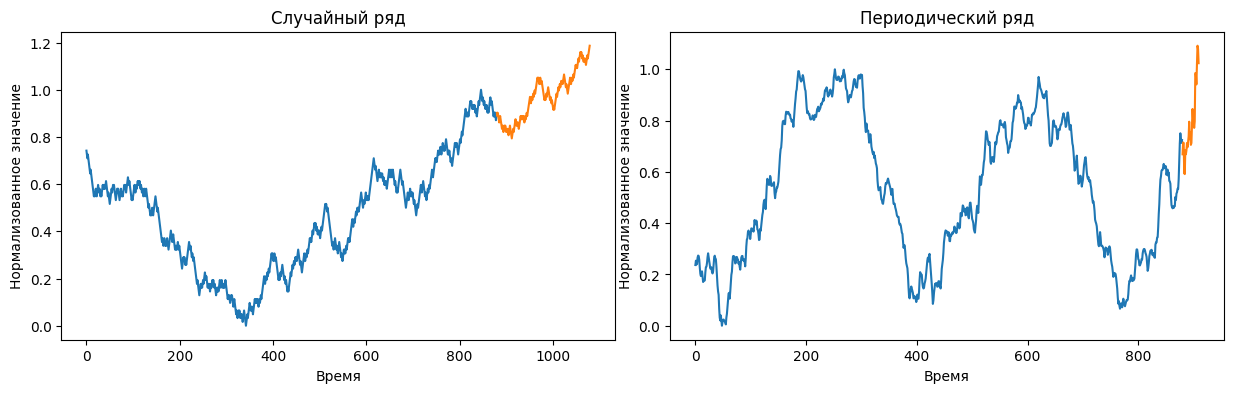

In [5]:
data_stock_pred = forecast(random_ts, h=200, m=13)
data_energy_pred = forecast(period_ts, h=30, m=6)

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)

axs[0].plot(np.arange(len(random_ts)), random_ts)
axs[0].plot(np.arange(len(data_stock_pred))+len(random_ts), data_stock_pred)
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Нормализованное значение')
axs[0].set_title('Случайный ряд')

axs[1].plot(np.arange(len(period_ts)), period_ts)
axs[1].plot(np.arange(len(data_energy_pred))+len(period_ts), data_energy_pred)
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Нормализованное значение')
axs[1].set_title('Периодический ряд')

plt.subplots_adjust(wspace=0.1)
plt.show()